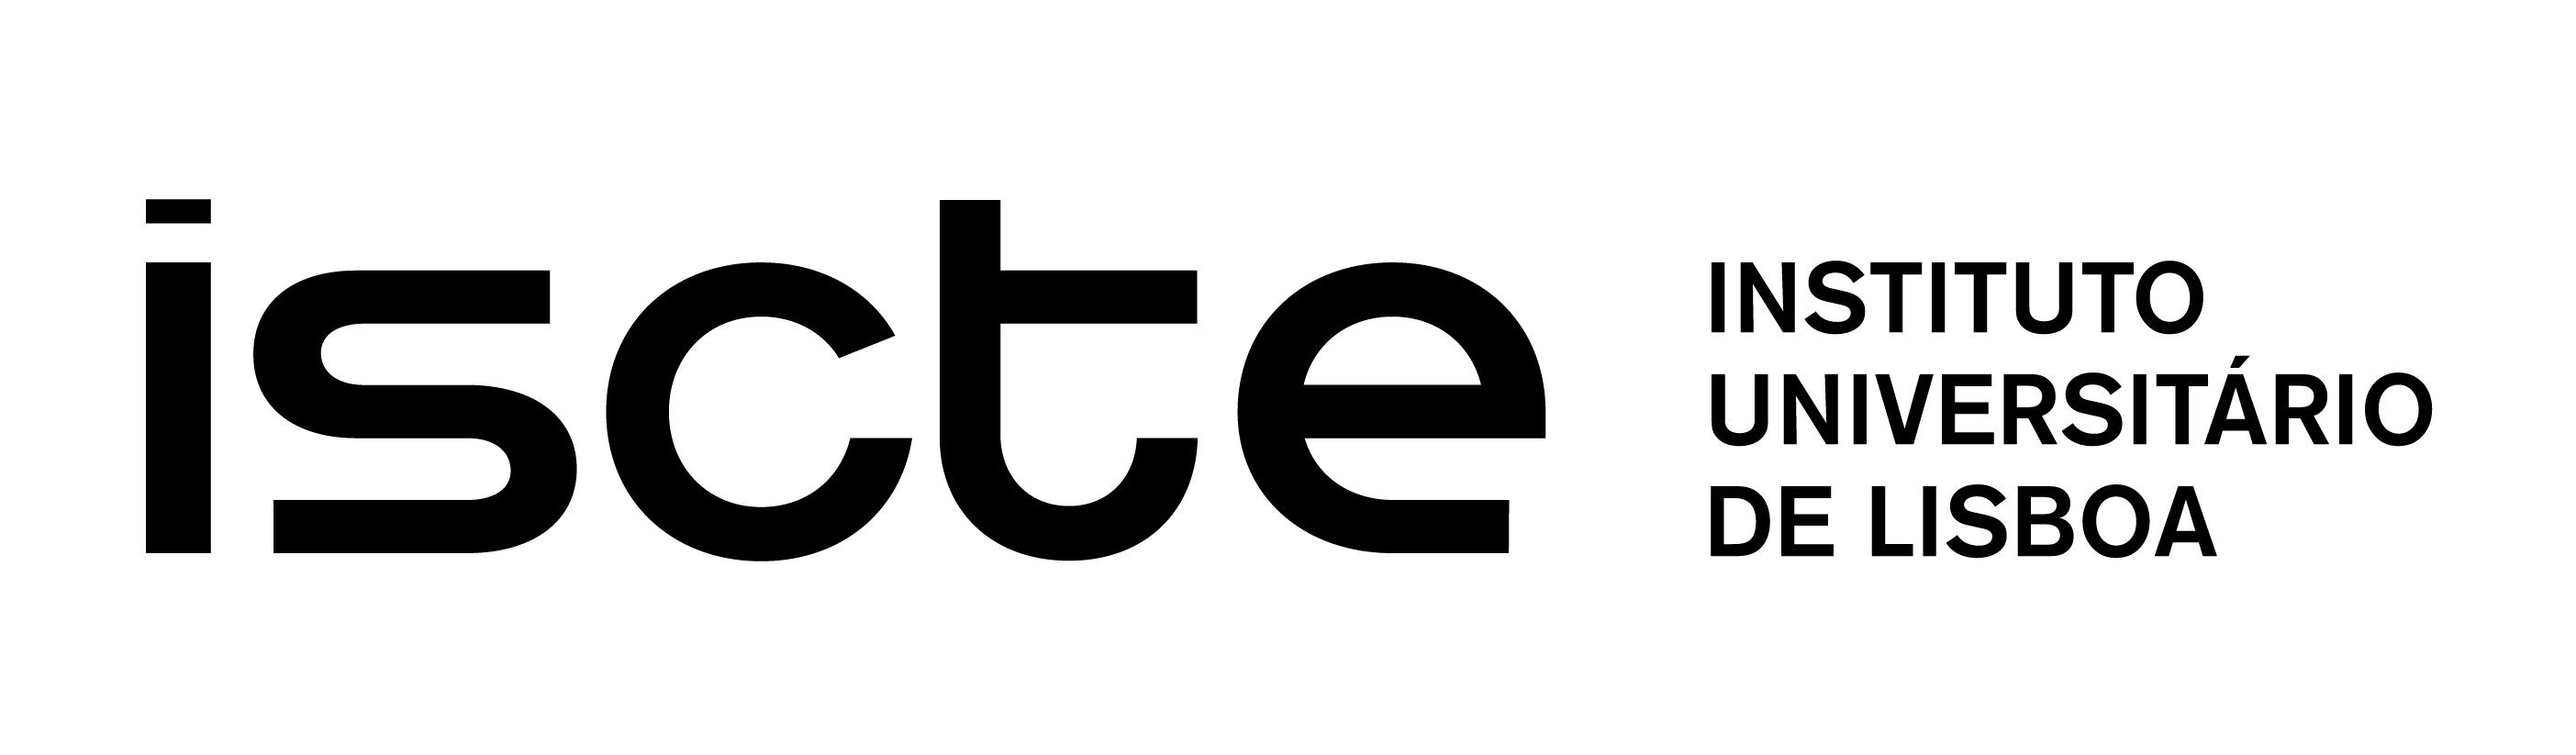

# Relatório do projeto de grupo intermédio EDA 

Docente: Maria Pinto Albuquerque

- Eliane Susso Efraim Gabriel, Nº 103303 
- João Francisco Marques Gonçalves da Silva Botas, Nº104782
- Maria João Ferreira Lourenço, Nº 104716
- Umeima Adam Mahomed, Nº99239

Data: 22/04/2022

-----------------------------------------------------------------------------

Para realizar o projeto de grupo intermédio da Unidade Curricular Estrutura de Dados e Algoritmos decidimos implementar a TAD Lista duplamente ligada e duplamente ligada circular, devido à nossa curiosidade e vontade de explorar este tipo de listas e de desafiar os nossos conhecimentos e de os aprofundar, uma vez que este tipo de listas não foi implementado em aula.

## Fase 1 - Implementação das TAD Listas

### ----------------------------------------------------- Lista Duplamente Ligada --------------------------------------------------------------------

Uma lista duplamente ligada é caracterizada por ter dois ponteiros, sendo que um aponta para o nó anterior e o outro aponta para o nó seguinte. A lista pode ser atravessada da esquerda para a direita e da direita para a esquerda. Deste modo, o construtor deste tipo de lista tem o self._ _ size que indica o tamanho da lista, o self._ _ head que aponta para o primeiro nó e o self.__tail que aponta para o último nó.  Além disso, cada nó da lista duplamente ligada tem um atributo que guarda o valor do elemento (self.data), o ponteiro para o próximo nó (self.next) e o ponteiro para o nó anterior (self.prev).

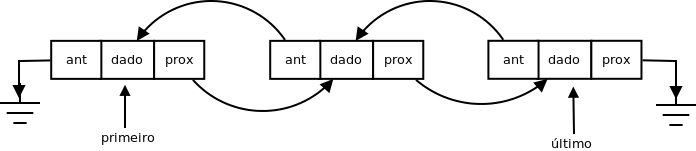

#### 1)  Comprimento ou tamanho: quantos itens estão na lista – len()

In [26]:
  def __len__(self):
        return self.__size

Utilizámos o self.__size para obter o tamanho da lista duplamente ligada e consequentemente foi-nos possível saber o número de nós desta.

#### 2) Indicar se a lista está vazia – vazia()

In [4]:
  def vazia(self):
        return self.__size == 0

Comparamos o self.__size com o número zero, para percebermos se o tamanho da lista era igual a zero ou não. Se for igual a zero, ou seja, se der True, a lista está vazia. Se por sua vez der False, a lista tem nós, pelo que não está vazia.

#### 3) Esvaziar a lista – limpar()

In [28]:
    def limpar(self):
        self.__head = None
        self.__tail = None
        self.__size = 0

O método limpar é igual ao construtor da classe ListaDL, sendo que os ponteiro head e tail, apontam para o primeiro e último elemento, respetivamente. Além disso, a lista fica vazia, eliminando os nós que estavam na sua constituição. 

#### 4) Consultar (devolver) elemento na posição p – ver(p) 

In [30]:
    def ver(self, p):
        if p >= self.__size or p < 0:  # se o index p é maior que o comprimento da lista ou se é menor que zero
            print("Erro - o índice pretendido está errado")
            return
        pointer = self.__head  # começa na head
        while p > 0:  # enquanto o índice está compreendido entre 0 e o tamanho da lista
            pointer = pointer.next  # percorre os nós
            p -= 1  # para apontar para o elemento e não para o próximo
        print(pointer.data)  # para ter o valor do nó pretendido

O método ver(p) verifica se a posição dada é menor que zero ou se é maior do que o tamanho da lista, ou seja, se está fora da lista, se tal for o caso, levanta a mensagem "Erro - o índice pretendido está errado".

Se a posição dada estiver entre zero e o tamanho da lista, o método vai precorrer a lista partindo da head e devolve o elemento que se encontra na posição p pretendida.

#### 5) Inserir um dado item na lista - ins(item) 

Este método foi dividido em três sub-métodos diferentes, o primeiro insere um nó no inicio da lista, o segundo insere no meio da lista e o último insere no fim da lista.

In [31]:
       def ins_front(self, item):
        new_node = Node(item)  # cria new_node
        if self.__head is None:  # se a lista está vazia
            self.__head = new_node  # a head passa a ser o new_node
        else:  # se a lista não está vazia
            new_node.next = self.__head  # ajusta a posição dos nós existentes
            self.__head.prev = new_node  # ajusta a posição dos nós existentes
            self.__head = new_node  # o novo nó passa a ser a cabeça
        self.__size += 1  # aumenta o comprimento

O método ins_front(item) começa por verificar se há algum nó na lista, se tal não se verificar, a head será o new_node.

Se a lista já for constituída por nós, o new_node será a nova head da lista.

Por fim, o self.__size irá aumentar em 1 e vai haver um ajuste da posição dos nós uma vez que foi inserido um elemento à lista.

In [1]:
    def ins_middle(self, item):
        # criar novo nó
        new_node = Node(item)

        # se a lista está vazia
        if self.__head == None:
            # a head e a tail apontam para o new_node
            self.__head = self.__tail = new_node
            # anterior da head aponta para None
            self.__head.prev = None
            # o seguinte da tail aponta para None, porque é o último nó da lista
            self.__tail.next = None
        else:
            # pointer aponta para head
            pointer = self.__head

            # guarda a posição do meio da lista
            meio = (self.__size // 2) if (self.__size % 2 == 0) else ((self.__size + 1) // 2)

            # Itera sobre a lista da posição do pointer para o meio
            for i in range(1, meio):
                pointer = pointer.next

            # Nó temp aponta para o nó depois do pointer
            temp = pointer.next
            temp.prev = pointer

            # new_node vai ser adicionado entre pointer e temp
            pointer.next = new_node
            new_node.prev = pointer
            new_node.next = temp
            temp.prev = new_node
        self.__size += 1

O método ins_middle(item) começa por verificar se a lista está vazia, se tal for o caso, a cabeça da lista e a cauda da lista vão ser o novo nó, sendo que o anterior da head e o seguinte da tail apontam para None. 

Caso contrário, vai procurar o meio da lista e guardar essa posição. De seguida, itera desde a posição do pointer até ao meio da lista. Seguidamente vai definir o nó temp, que aponta para o nó depois do pointer e adiciona o new_node entre o pointer - elemento antes do new_node - e o temp - elemento depois do new_node - a fim de juntar o novo nó à lista. 

Por fim, o self.__size irá aumentar em 1 e vai haver um ajuste da posição dos nós uma vez que foi inserido um elemento à lista.

In [2]:
    def ins_end(self, item):
        new_node = Node(item)  # cria new_node
        if self.__head is None:  # se a lista está vazia
            self.__head = new_node  # novo nó passa a ser a cabeça
        else:  # se a lista não está vazia
            pointer = self.__head
            while pointer.next is not None:  # enquanto houver nó seguinte
                pointer = pointer.next  # percorre a lista
            pointer.next = new_node  # o nó depois do pointer é o novo nó
            new_node.prev = pointer  # ajuste do ponteiro
        self.__size += 1  # aumenta o comprimento

O método ins_end(item) começa por verificar se a lista está vazia, se tal for o caso, a head vai ser o new_node. 

Se não estiver vazia, o ponteiro vai percorrer a lista e o new_node vai ser adicionado depois do último nó.

Finalmemte, o self.__size irá aumentar em 1 e vai haver um ajuste da posição dos nós uma vez que foi inserido um elemento à lista.

#### 6) Remover um determinado item da lista - rem(item) 

In [1]:
   def rem(self, item):
        if self.__head is None:  # se a lista estiver vazia
            print("A lista não têm elementos para remover")
            return
        pointer = self.__head
        while pointer is not None:  # lista com elementos
            nxt = pointer.next  # percorre a lista
            if pointer.data == item:  # se o valor do nó é igual ao item
                if pointer.prev:  # anterior 
                    pointer.prev.next = pointer.next # muda o anterior apenas se o nó a eliminar não
        # é o primeiro nó
                else:
                    self.__head = pointer.next  # se a head é para ser removida, o nó seguinte passa a ser a nova head
                if pointer.next:  # seguinte 
                    pointer.next.prev = pointer.prev  # muda o seguinte apenas se o nó que é para eliminar não é
        # o último nó
                else:
                    self.__tail = pointer.prev  # se a tail é para ser removida o nó antes da tail passa a
                    # ser a nova tail
            pointer = nxt
        self.__size -= 1  # ajusta o comprimento

O método rem(item) começa por ver se a lista está vazia, ou seja se a head não existe, se este for o caso imprime a seguinte mensagem: "A lista não tem elementos para remover". 

Se a lista tiver nós, esta vai ser percorrida até que se encontre o valor do nó correspondente ao item pedido. Nesse caso, esse nó é removido e a lista é devolvida sem esse elemento. Se pretendermos remover a head, o nó seguinte à antiga head passa a ser a nova head. Se pretendermos eliminar a tail, o nó antes da tail antiga passa a ser a nova tail. No que se refere a eliminar nós no meio, precisamos de saber se o item a eliminar está à frente ou depois do ponteiro. 

Por fim, o self.__size irá diminuir em 1 e vai haver um ajuste da posição dos nós uma vez que foi removido um elemento à lista.

#### 7) Mostrar o conteúdo completo da lista – mostrar()


In [39]:
    def __str__(self):
        values = '['  # como quero mostrar a lista
        pointer = self.__head  # percorrer a partir da cabeça
        if pointer == None:   # se a lista estiver vazia
            return values + "]"
        while pointer is not None:  # enquanto não chegarmos ao fim da lista
            values += "{0} ".format(pointer.data)  # mostrar cada elemento
            pointer = pointer.next  # passar ao elemento seguinte da lista
        values += ']'  # fechar
        return values  # mostrar os valores


Queremos mostrar a lista da forma [ ], para tal o método percorre a lista a partir da head, nó a nó, até chegar à tail, adicionando os valores dos nós dentro dos parênteses retos.

#### 8) Indicar se existe na lista um item com um dado valor – existe(item) - Pesquisa Linear

In [5]:
    def existe(self, item):
        i = 1  # começa no início
        found = False
        pointer = self.__head  # ponteiro aponta para a cabeça

        # se a lista está vazia
        if self.__head == None:
            print("A lista está vazia")
            return

        # lista com elementos
        while pointer != None:
            # compara o valor do item com o valor do nó presente na lista
            if pointer.data == item:  # se o valor for igual ao item
                found = True
                break
            pointer = pointer.next  # percorre os nós
            i += 1

        if found:  # se encontrou devolve a mensagem em baixo
            print("O item " + str(item) + " está na posição " + str(i))
        else:  # se não encontrou
            print("0")
            print("Explicação: o item procurado não se encontra na lista, pelo que retornou 0")


O método existe(item), numa fase inicial, verifica se a lista está vazia, se tal for o caso, vai devolver a mensagem "A lista está vazia". 

Se não estiver vazia, vai percorrer a lista nó a nó - pesquisa sequencial - e se encontrar o item devolve uma mensagem do tipo " O item x está na posição i", sendo que isto apenas acontece quando o valor do nó é igual ao item. 

Se depois de percorrer toda a lista não encontrar o item pretendido retornará zero, tal como pedido no enunciado, seguido de uma mensagem de explicação: "Explicação: o item procurado não se encontra na lista, pelo que retornou 0".

Nota: É importante ter em consideração que a posição está de encontro à forma de contar corrente, por isso vai da posição 1 até à posição referente ao tamanho da lista. Pelo que para ir de encontro à especificidade do enunciado, quando o item não existe é devolvido zero, seguido de uma mensagem explicativa.

#### 8) Indicar se existe na lista um item com um dado valor – existe(item) -Pesquisa Binária

In [16]:
    # encontrar o meio

    def find_middle(self, beginning, end):
        if beginning is None:  # lista vazia
            return None

        slow_pointer = beginning  # ponteiro para o primeiro nó
        fast_pointer = beginning.next  # ponteiro para o nó depois do primeiro nó

        while fast_pointer != end:  # enquanto fast_pointer diferente do último nó

            fast_pointer = fast_pointer.next  # percorre a lista
            if fast_pointer != end:
                slow_pointer = slow_pointer.next
                fast_pointer = fast_pointer.next

        return slow_pointer

    def existe_binary_search(self, item, sort_method='m'):
        # Bubble Sort
        if sort_method == 'b' or sort_method == 'B':
            self.ordenar_bubble_sort()
        # Merge Sort
        if sort_method == 'm' or sort_method == 'M':
            self.__head = self.ordenar_merge_sort(self.__head)
        # método mais eficaz
        else:
            print("Método de ordenação não identificado. Merge Sort será utilizado")
            self.__head = self.ordenar_merge_sort(self.__head)

        start = self.__head
        end = None
        start_pos = 0  # começa na posição 0
        end_pos = self.__len__()  # acaba quando atingue o tamanho da lista
        while True:
            middle = self.find_middle(start, end)  # vai buscar o método find_middle
            middle_pos = (start_pos + end_pos) // 2  # como calcular middle_pos

            if middle is None:  # se lista vazia
                return 0
            if middle.data == item:  # se valor igual ao item
                return middle_pos

            if middle.data < item:  # valor menor que item
                start = middle.next
                start_pos = middle_pos + 1
            else:  # valor maior que item
                end = middle
                end_pos = middle_pos - 1

            if not (end is None or end != start):
                break
        return ("0 - Devolve zero porque o item não foi encontrado")

O método principal existe_binary_search(item, sort_method='m') tem um método auxiliar - find_middle(beginning, end), que encontra o valor correspondente ao meio da lista, percorrendo-a caso esta não esteja vazia.

Primeiro este método ordena a lista utilizando o Buble Sort ou o Merge Sort. Se nenhum for especificado utiliza o Merge Sort, pois é o mais eficiente tendo em conta que não tem que percorrer a lista toda até esta estar completamente ordenada - método da força bruta. 

De seguida, aplica-se a pesquisa binária, sendo que a lista vai ser dividida ao meio, os valores mais pequenos vão para a esquerda e os maiores valores vão para a direita. 

Deste modo, vai ser devolvida a posição/índice do item sempre que o valor do nó corresponder ao item e devolve "0 - Devolve zero porque o item não foi encontrado", caso o item não faça parte da lista.


Nota: É importante ter em consideração que a posição está de encontro à forma de contar corrente, por isso vai da posição 1 até à posição referente ao tamanho da lista. Pelo que para ir de encontro à especificidade do enunciado, quando o item não existe é devolvido zero, seguido de uma mensagem explicativa.

#### 9) Ordenar a lista – ordenar_()

Nesta etapa decidimos implementar dois algoritmos de ordenação: o Mergesort - classe (a) - e o Bubblesort - classe (b). Seguidamente, na Fase 2 foi verificada a eficiência de cada um a fim de ser implementado o algoritmo mais eficiente para o método ordenar_().

##### - Bubble sort

O Bubble Sort é um algoritmo de ordenamento que itera a lista várias vezes - método da força bruta - até que toda a lista esteja ordenada, sendo que o valor do elemento à esquerda tem que ser mais pequeno que o da direita. Deste modo, consiste na troca contínua de elementos adjacentes que se encontram na ordem errada, até que estes estejam ordenados de forma crescente, tendo, por isso, uma estratégia incremental por base. 

O código do Bubble Sort é o seguinte:

In [11]:
    def ordenar_bubble_sort(self):
        if self.__head is None:  # lista vazia
            print("A lista está vazia!")
            return

        swap = 0
        last_pointer = None
        while True:  # continuar iterações até a lista estar ordenada
            swap = 0
            aux_pointer = self.__head  # primeiro nó
            while aux_pointer.next != last_pointer:  # enquanto seguinte diferente do último
                if aux_pointer.data > aux_pointer.next.data:  # valor do nó maior que o valor do nó seguinte
                    aux_data = aux_pointer.data
                    aux_pointer.data = aux_pointer.next.data
                    aux_pointer.next.data = aux_data
                    swap = 1  # troca com o nó adjacente
                aux_pointer = aux_pointer.next  # percorre a lista
            last_pointer = aux_pointer
            if swap == 0:  # quando está tudo ordenado
                break

O método ordenar_bubble_sort() começa por ver se a lista está vazia se esse for o caso, vai imprimir a mensagem "A lista está vazia!". 

Se a lista tiver elementos, este método vai funcionar até que todos os nós estejam ordenados por ordem crescente. Deste modo, vai percorrer a lista até que o nó a seguir ao ponteiro seja diferente do último e enquanto o valor do nó seguinte seja maior que o valor do nó atual. 

Assim, vai haver troca de uma posição entre nós adjacentes até que o da esquerda tenha um valor mais pequeno que o da direita, pois apenas nessa situação podemos afirmar que a lista está ordenada.

##### - Merge sort

O Merge Sort é um algoritmo de ordenamento do tipo Divide and Conquer, pelo que divide a lista recursivamente em duas partes que tendem a ter o mesmo tamanho até obter apenas elementos individuais, organizando-os, ou seja, colocando-os por ordem crescente e juntando cada duas partes já ordenadas.

O código do Merge Sort é o seguinte:

In [15]:
    # obter o meio da lista

    def get_middle(self, aux_head):
        if aux_head == None:  # se vazia
            return aux_head

        slow_pointer = fast_pointer = aux_head  # ponteiros

        while fast_pointer.next != None and fast_pointer.next.next != None:  # percorre a lista
            slow_pointer = slow_pointer.next
            fast_pointer = fast_pointer.next.next

        return slow_pointer

    #  função recursiva que funde nós de 2 listas ordenadas em 1 única lista ordenada

    def sorted_merge(self, left, right):
        result_node = None

        # casos base
        if left == None:
            return right

        if right == None:
            return left

        # escolher right ou left

        if left.data <= right.data:  # valores da esquerda menores ou iguais aos valores da direita
            result_node = left
            result_node.next = self.sorted_merge(left.next, right)
        else:
            result_node = right
            result_node.next = self.sorted_merge(left, right.next)

        return result_node

    # para fazer Merge Sort

    def ordenar_merge_sort(self, aux_pointer_head):
        if aux_pointer_head is None or aux_pointer_head.next is None:  # lista vazia
            return aux_pointer_head

        middle = self.get_middle(aux_pointer_head)  # chama o método get_middle

        middle_next = middle.next

        middle.next = None
        # middle_next.prev = None

        # recorrer às metades da esquerda e da direita

        left_list = self.ordenar_merge_sort(aux_pointer_head)
        right_list = self.ordenar_merge_sort(middle_next)

        # juntar as metades da esquerda e da direita já ordenadas

        sorted_list = self.sorted_merge(left_list, right_list)
        # -> -> ->

        walker = sorted_list
        prev = None
        # node: 1 -> 2 -> 3 -> 4
        # prev: N -> 1 -> 2 -> 3
        while walker:
            walker.prev = prev
            prev = walker
            walker = walker.next

        return sorted_list  # lista ordenada

 O método ordenar_merge_sort(aux_pointer_head) é um método principal com os seguintes métodos auxiliares get_middle(aux_head) - encontra o meio da lista - e sorted_merge(left, right) - funde duas partes já ordenadas.
 
No get_middle(aux_head) recorreu-se à estratégia dos slow_pointer (o nó seguinte do ponteiro aux_head) e fast_pointer ( dois nós depois do ponteiro aux_head). 

No sorted_merge(left, right) tivemos que avaliar os valores da esquerda e da direita das partes. 

O ordenar_merge_sort(aux_pointer_head) utiliza os métodos auxiliares referidos acima para dar a lista completamente ordenada.

In [17]:
    def ordenar_(self, sort_method='m'):
        # Bubble Sort
        if sort_method == 'b' or sort_method == 'B':
            self.ordenar_bubble_sort()
            return True
        # Merge Sort
        elif sort_method == 'm' or sort_method == 'M':
            self.__head = self.ordenar_merge_sort(self.__head)
            return True
        # letra errada
        else:
            print("Método de ordenação não identificado")
            return False

O método ordenar_(sort_method='m') recebe um dos métodos de ordenação - ordenar_bubble_sort() ou ordenar_merge_sort().

Este método recebe como parâmetro o tipo de ordenação, b ou B de Bubble Sort e  m ou M de Merge Sort. 

Caso o parâmetro dado seja diferente destas hipóteses, a lista não vai ser ordenada e a seguinte mensagem vais ser impressa ("Método de Ordenação não identificado").

------------------------------------------------------------------------------------------------------------------------

### --------------------------------------------------- Lista Duplamente Ligada ----------------------------------------------------------------------

A lista duplamente ligada circular tem a mesma estrutura que a lista duplamente ligada. O nó anterior ao primeiro nó da lista aponta para o último nó desta e o nó depois do último nó da lista aponta para o primeiro nó desta. Deste modo, o construtor deste tipo de lista tem o self._ _ size que indica o tamanho da lista, o self._ _ head que aponta para o primeiro nó e o self.__tail que aponta para o último nó.  Além disso, cada nó da lista duplamente ligada circular tem um atributo que guarda o valor do elemento (self.data), o ponteiro para o próximo nó (self.next) e o ponteiro para o nó anterior (self.prev).

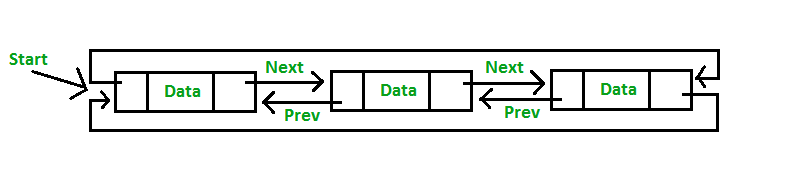

#### 1)  Comprimento ou tamanho: quantos itens estão na lista – len()

In [43]:
    def __len__(self):
        return self.__size

Utilizámos o self.__size para obter o tamanho da lista duplamente ligada circular e consequentemente foi-nos possível saber o número de elementos desta.

#### 2) Indicar se a lista está vazia – vazia()

In [44]:
    def vazia(self):
        return self.__size == 0

Comparámos o self.__size com o número zero, para percebermos se o tamanho da lista era igual a zero ou não. Se for igual a zero, ou seja, se der True, a lista está vazia. Se por sua vez der False, a lista tem elementos, pelo que não está vazia.

#### 3) Esvaziar a lista – limpar()

In [45]:
    def limpar(self):
        self.__size = 0
        self.__head = None
        self.__tail = None

O método limpar é igual ao construtor da classe ListaDL, sendo que os ponteiro head e tail, apontam para o primeiro e último elemento, respetivamente. Além disso, a lista fica vazia, eliminando os nós que estavam na sua constituição. 

#### 4) Consultar (devolver) elemento na posição p – ver(p)  ESTÁ MAL

In [46]:
    def ver(self, p):
        if p < 0 or p >= self.__size:  # se o index p é maior que o comprimento da lista ou se é menor que z
            print("Erro - o índice pretendido está errado")
        pointer = self.__head  # começa na head
        while p > 0:  # enquanto o índice está compreendido entre 0 e o tamanho da lista
            pointer = pointer.next  # percorre os nós
            p -= 1  # para apontar para o elemento e não para o próximo
        print(pointer.data)  # para ter o valor do nó pretendido

O método ver(p) verifica se a posição dada é menor que zero ou se é maior do que o tamanho da lista, ou seja, se está fora da lista e se tal for o caso, levanta a mensagem "Erro - o índice pretendido está errado".

Se a posição dada estiver entre zero e o tamanho da lista, o método vai precorrer a lista partindo da head e devolve o elemento que se encontra na posição p pretendida.

#### 5) Inserir um dado item na lista - ins(item) 

Apenas realizamos o método ins_end, que insere um nó no fim da fila porque como a lista é duplamente ligada circular é o mesmo inserir um nó no início ou no fim da lista.

In [2]:
    def ins_end(self, item):
        new_node = Node(item)  # criar nó
        if self.__head is None:  # lista vazia
            self.__head = new_node  # head é o new_node
            self.__tail = new_node  # tail é o new_node
            self.__size += 1  # corrige o tamanho
            return
        # lista com elementos
        new_node.prev = self.__tail  # ajuste da posição da tail
        new_node.next = self.__head  # ajuste da posição da head
        self.__tail.next = new_node  # o seguinte da tail passa a ser o new_node
        self.__head.prev = new_node  # o antes da head é o new_node
        self.__tail = new_node  # tail é o novo nó
        self.__size += 1  # aumenta o comprimento

O método ins_end(item) verifica se a lista está vazia, se tal for o caso, a head e a tail vão ser o new_node.

Se não estiver vazia, a tail e o anterior da head passam a ser o new_node e existe um ajuste sendo que a tail passa a ser o nó anterior ao new_node e o seguinte do new_node é a head.

Por fim, o self.__size irá aumentar em 1 e vai haver um ajuste da posição dos nós uma vez que foi inserido um elemento à lista.

#### 6) Remover um determinado item da lista - rem(item)

In [3]:
     # remover um determinado item da lista - rem(item)
    
     def rem(self, item):
        # se a fila estiver vazia
        if self.__head == None:
            print('A fila está vazia!')
            return None
        # começa no primeiro nó(head) e irá andar de next em next até encontrar o elemento
        passo = self.__head
        # posição anterior ao elemento que encontrar (começa em None e vai adquirindo o valor de passo)
        previous = None
        # ciclo que procura o nó ao longo da lista DLC
        while passo.data != item:  # enquanto o valor do nó for diferente do item
            # Se o ciclo terminar e encontrar a head: não existe o elemento a pesquisar
            if passo.next == self.__head:
                print('A lista não tem este elemento!')
                return self.__head
            # avanço do ciclo (next)
            previous = passo
            passo = passo.next
        # Caso seja o primeiro
        if passo.next == self.__head and previous == None:
            return None
        # Caso exista mais de um nó na lista
        if passo == self.__head:
            # alteração dos nós na remoção com utilização do previous e do próximo elemento
            previous = self.__head.prev
            next_elem = self.__head.next
            previous.next = next_elem
            next_elem.prev = previous
        # Caso seja o último elemento da lista DLC
        elif passo.next == self.__head:
            # troca entre nós do início e fim (head e tail)
            previous.next = self.__head
            self.__head.prev = previous
            self.__tail=previous
        else:
            # caso contrário irá alterar utilizando o next e o previous
            temp = passo.next
            previous.next = temp
            temp.prev = previous
        # retirar sempre um tamanho à lista
        self.__size -= 1
        return self.__head

Se a lista estiver vazia, não pode remover nós, logo vai imprimir a seguinte mensagem "A lista está vazia!".

Enquanto o valor do passo for diferente do valor do item, a lista vai continuar a ser percorrida até que estes dois valores sejam iguais. Deste modo, implementamos o rem(item) de modo a que funcionasse quando o nó a ser removido é o primeiro, quando existe mais do que um nó na lista, caso seja o último. 

Por fim, o self.__size irá diminuir em 1 e vai haver um ajuste da posição dos nós uma vez que foi removido um elemento da lista.

#### 7) Mostrar o conteúdo completo da lista – mostrar()

In [1]:
    def __str__(self):
        values = '['  # como quero mostrar a lista
        if self.__head is None:  # lista vazia
            return values + "]"
        pointer = self.__tail.next = self.__head  # percorrer
        while pointer:  # enquanto não chegarmos ao fim da lista
            values += "{0} ".format(pointer.data)  # mostrar cada elemento
            pointer = pointer.next  # passar ao elemento seguinte da lista
            if pointer == self.__tail.next:
                break
        values += ']'  # fechar
        return values  # mostrar os valores

Queremos mostrar a lista da forma [ ], para tal o método percorre a lista a partir da head, nó a nó, até chegar à tail, adicionando os valores dos nós dentro dos parênteses retos.

#### 8) Indicar se existe na lista um item com um dado valor – existe(item) - Pesquisa Linear

In [3]:
    def existe(self, item):
        position = 0  # começa no início
        if self.__head is None:  # lista vazia
            print("A lista está vazia!")
        else:  # lista com nós
            pointer = self.__head
            while pointer:  # enquanto a lista não acaba
                position += 1
                if pointer.data == item:  # se o valor do nó é igual ao item
                    print("O item " + str(item) + " está na posição " + str(position))
                    break
                if pointer == self.__tail:  # se não tem o item procurado 
                    print("0")
                    print("Explicação: o item procurado não se encontra na lista, pelo que retornou 0")
                    break
                pointer = pointer.next  # percorre a lista

O método existe(item), numa fase inicial, verifica se a lista está vazia, se tal for o caso, vai devolver a mensagem "A lista está vazia!". 

Se não estiver vazia, vai percorrer a lista nó a nó - pesquisa sequencial - e se encontrar o item devolve uma mensagem do tipo " O item x está na posição i", sendo que encontra quando o valor do nó é igual ao item.

Se depois de percorrer toda a lista não encontrar o item pretendido retornará zero, tal como pedido no enunciado, seguido de uma mensagem de explicação: "Explicação: o item procurado não se encontra na lista, pelo que retornou 0".

Nota: É importante ter em consideração que a posição está de encontro à forma de contar corrente, por isso vai da posição 1 até à posição referente ao tamanho da lista. Pelo que para ir de encontro à especificidade do enunciado, quando o item não existe é devolvido zero, seguido de uma mensagem explicativa.

#### 8) Indicar se existe na lista um item com um dado valor – existe(item) - Pesquisa Binária

In [24]:
# encontrar o meio

def find_middle(self, beginning, end):
    if beginning is None:  # lista vazia
        return None

    slow_pointer = beginning  # ponteiro para o primeiro nó
    fast_pointer = beginning.next  # ponteiro para o nó depois do primeiro nó

    while fast_pointer != end:  # enquanto fast_pointer diferente do último nó

        fast_pointer = fast_pointer.next  # percorre a lista
        if fast_pointer != end:
            slow_pointer = slow_pointer.next
            fast_pointer = fast_pointer.next

    return slow_pointer

def existe_binary_search(self, item, sort_method='m'):
    # Bubble Sort
    if sort_method == 'b' or sort_method == 'B':
        self.ordenar_bubble_sort()
    # Merge Sort
    if sort_method == 'm' or sort_method == 'M':
        self.__head = self.ordenar_merge_sort(self.__head)
    # método mais eficaz
    else:
        print("Método de ordenação não identificado. Merge Sort será utilizado")
        self.__head = self.ordenar_merge_sort(self.__head)

    start = self.__head
    end = None
    start_pos = 1  # começa na posição 0
    end_pos = self.__len__()  # acaba quando atingue o tamanho da lista
    while True:
        middle = self.find_middle(start, end)  # vai buscar o método find_middle
        middle_pos = (start_pos + end_pos) // 2  # como calcular middle_pos

        if middle is None:  # se lista vazia
            return 0
        if middle.data == item:  # se valor igual ao item
            return middle_pos

        if middle.data < item:  # valor menor que item
            start = middle.next
            start_pos = middle_pos + 1
        else:  # valor maior que item
            end = middle
            end_pos = middle_pos - 1

        if not (end is None or end != start):
            break
    return ("0 - Devolve zero porque o item não foi encontrado")


O método principal existe_binary_search(item, sort_method='m') tem um método auxiliar - find_middle(beginning, end), que encontra o valor correspondente ao meio da lista, percorrendo-a caso esta não esteja vazia.

Primeiro este método ordena a lista utilizando o Buble Sort ou o Merge Sort. Se nenhum for especificado utiliza o Merge Sort, pois é o mais eficiente tendo em conta que não tem que percorrer a lista toda até esta estar completamente ordenada - método da força bruta. 

De seguida, aplica-se a pesquisa binária, sendo que a lista vai ser dividida ao meio, os valores mais pequenos vão para a esquerda e os maiores valores vão para a direita. 

Deste modo, vai ser devolvida a posição/índice do item sempre que o valor do nó corresponder ao item e devolve "0 - Devolve zero porque o item não foi encontrado", caso o item não faça parte da lista.


Nota: É importante ter em consideração que a posição está de encontro à forma de contar corrente, por isso vai da posição 1 até à posição referente ao tamanho da lista. Pelo que para ir de encontro à especificidade do enunciado, quando o item não existe é devolvido zero, seguido de uma mensagem explicativa.

#### 9) Ordenar a lista – ordenar()

Tal como no tipo de lista anterior, este tipo de lista também tem a implementação dos dois algoritmos para o método de ordenação, apenas na fase 2 os dois algoritmos foram testados a fim de se perceber o mais eficiente.

##### - Bubble sort

In [26]:
    def ordenar_bubble_sort(self):
        if self.__head is None:  # lista vazia
            print("A lista está vazia!")
            return

        swap = 0
        last_pointer = self.__head
        while True:  # continuar iterações até a lista estar ordenada
            swap = 0
            aux_pointer = self.__head  # primeiro nó
            while aux_pointer.next != last_pointer:  # enquanto seguinte diferente do último
                if aux_pointer.data > aux_pointer.next.data:  # valor do nó maior que o valor do nó seguinte
                    aux_data = aux_pointer.data
                    aux_pointer.data = aux_pointer.next.data
                    aux_pointer.next.data = aux_data
                    swap = 1  # troca com o nó adjacente
                aux_pointer = aux_pointer.next  # percorre a lista
            last_pointer = aux_pointer
            if swap == 0:  # quando está tudo ordenado
                break

O método ordenar_bubble_sort() começa por ver se a lista está vazia se esse for o caso, vai imprimir a mensagem "A lista está vazia!".

Se a lista já tiver elementos, este método vai funcionar até que todos os nós estejam ordenados por ordem crescente. Deste modo, vai percorrer a lista até que o nó a seguir ao ponteiro seja diferente do último e enquanto o valor do nó seguinte seja maior que o valor do nó atual. 

Assim, vai haver troca de uma posição entre nós adjacentes até que um o da esquerda tenha um valor mais pequeno que o da direita, pois apenas nessa situação podemos afirmar que a lista está ordenada.

##### - Merge sort

In [27]:
    # juntar as partes
    def merge(self, a, b):

        # se a primeira lista ligada estiver vazia
        if a is None:
            return b

        # se a segunda lista ligada estiver vazia
        if b is None:
            return a

        # escolher o valor mais pequeno
        if a.data < b.data:
            a.next = self.merge(a.next, b)
            a.next.prev = a
            a.prev = None
            return a
        else:
            b.next = self.merge(a, b.next)
            b.next.prev = b
            b.prev = None
            return b

    # dividir a lista em duas listas com metade do tamanho

    def split(self, head):
        # head.prev.next = None
        # head.prev = None

        f = s = head
        while True:
            if f.next is None:
                break
            if f.next.next is None:
                break
            f = f.next.next
            s = s.next

        pointer = s.next
        s.next = None
        pointer.prev = None

        return pointer

    # implementar Merge Sort

    def ordenar_merge_sort(self, head):
        if head is None:  # lista vazia
            return head
        if head.next is None:
            return head

        # quebrar a conexão circular para que a ordenação seja facilitada
        if head.prev:
            head.prev.next = None
            head.prev = None

        s = self.split(head)

        # voltar às metades da esquerda e da direita
        head = self.ordenar_merge_sort(head)
        s = self.ordenar_merge_sort(s)

        # fundir as duas metades já ordenadas
        return self.merge(head, s)

O método ordenar_merge_sort(head) é um método principal com os seguintes métodos auxiliares slipt(head) e merge(a, b). 

O slipt(head) parte a lista em 2 partes desordenadas, o merge(a, b) junta duas partes ordenadas de cada vez de maneira a que no fim se tenha uma lista ordenada por ordem crecente.

O ordenar_merge_sort(head) junta os dois métodos auxiliares mencionados acima, fazendo com que a lista fique ordenada na sua totalidade.

In [28]:
    def ordenar_(self, sort_method='m'):
        # Bubble Sort
        if sort_method == 'b' or sort_method == 'B':
            self.ordenar_bubble_sort()
            return True
        # Merge Sort
        elif sort_method == 'm' or sort_method == 'M':
            self.__head = self.ordenar_merge_sort(self.__head)

            walker = self.__head
            while walker.next:
                walker = walker.next

            # fazer update do anterior da head e do seguinte da tail 
            # porque perdeu a conexão durante o ordenamento

            walker.next = self.__head
            self.__head.prev = walker

            return True
        else:
            print("Método de ordenação não identificado")
            return False

O método ordenar(sort_method = 'm') recebe um dos métodos de ordenação - ordenar_bubble_sort() ou ordenar_merge_sort. 

Este método recebe como parâmetro o tipo de ordenação, b ou B de Bubble Sort e  m ou M de Merge Sort. 

Caso o parâmetro dado seja diferente destas hipóteses, a lista não vai ser ordenada e a seguinte mensagem vai ser impressa ("Método de ordenação não identificado").

## Fase 2 - Análise da complexidade de algoritmos 

### - Análise temporal empírica 

#### Pesquisa binária vs pesquisa linear

Em teoria, a complexidade temporal da pesquisa binária é O(log n) no pior cenário, que ocorre quando o valor pretendido está ou no extremo da lista ou nem se encontra nesta, uma vez que o algoritmo  funciona pela divisão da lista em duas partes tendencialmente iguais. No melhor cenário a complexidade seria O(1), onde o valor do meio seria o valor pretendido. 

Para avaliar a complexidade temporal fizemos o método performance_binary_search(tamanho), que conta o tempo que a pesquisa binária demora a ordenar a lista e a procurar o item. Para isso chama o método existe_binary_search(item, sort_method='m'), explicado na Fase 1.

In [2]:
def performance_binary_search(self, tamanho):

    random_numbers1 = random.sample(range(10000), tamanho)  # números  aleatórios
    item_a_procurar = 1  # valor que se quer procurar
    random.shuffle(random_numbers1)  # reorganiza a ordem dos elementos

    for n in random_numbers1:
        self.ins_end(n)  # chama o método ins_end(item)
    tic = time.perf_counter()  # retorna o valor decimal do tempo do tic
    self.existe_binary_search(item_a_procurar, 'm')  # chama o método
    # existe_binary_search(item, sort_method='m')
    tac = time.perf_counter()  # retorna o valor decimal do tempo do tac
    self.limpar()  # chama o método limpar()
    
    return tac - tic

Em teoria, a complexidade temporal da pesquisa linear é O(n) no pior cenário, que ocorre quando o valor pretendido está ou no extremo da lista ou nem se encontra nesta. No melhor cenário é O(1), pois o valor pretendido é o primeiro elemento da lista.

Para avaliar a complexidade temporal fizemos o método performance_linear_search(tamanho), que conta o tempo que a pesquisa linear demora a procurar o item. Para isso chama o método existe_linear_search(item), explicado abaixo.

In [1]:
def performance_linear_search(self, tamanho):
    
    random_numbers1 = random.sample(range(10000), tamanho)  # números aleatórios
    item_a_procurar = 1  # valor que se quer procurar
    random.shuffle(random_numbers1)   # reorganiza a ordem dos elementos
    
    for n in random_numbers1:
        self.ins_end(n)  # chama o método ins_end(item)
    tic = time.perf_counter()  # retorna o valor decimal do tempo do tic
    self.existe_linear_search(item_a_procurar)  #  # chama o método
    # existe_linear_search(item)
    tac = time.perf_counter()  # retorna o valor decimal do tempo do tac
    self.limpar()  # chama o método limpar()
    
    return tac - tic

O método existe_linear_serach(item) é igual ao método existe(item) da Fase 1 só que sem as mensagens que este naturalmente imprimiria para dar a posição do item caso este estivesse na lista ou se este não fosse encontrado.

In [2]:
# Função auxiliar para o Linear

def existe_linear_search(self, item):
        position = 0  # começa na posição 0
        if self.__head is None:  # lista vazia
            print("A lista está vazia!")
        else:  # lista com nós
            pointer = self.__head
            while pointer:  # enquanto a lista não acaba
                position += 1
                if pointer.data == item:  # se o valor do nó é igual ao item
                    break
                if pointer == self.__tail:  # se não tem o item procurado
                    break
                pointer = pointer.next  # percorre a lista

O método searchers() vai criar uma tabela (Tabela 1) e um gráfico (Gráfico 1) para a lista duplamente ligada circular e para a lista duplamente ligada quando a pesquisa binária e linear são utilizadas.

O código para a construção da Tabela 1 é o seguinte:

In [ ]:
def searchers():
    plt.close()
    lst = ListaDL()
    lsta = ListaDLC()
    n_elementos = list(range(1, 500, 10))

    # tabelas

    # tabela binary search duplamente ligada circular
    # uso do tabulate
    table1 = [['Lista DLC', '10 elementos', '100 elementos', '500 elementos'],
              ['Binary search', lsta.performance_binary_search(10),
               lsta.performance_binary_search(100), lsta.performance_binary_search(500)]]
    # teste de tempo com 10, 100 e 500 elementos
    # chama o método performance_binary_search(tamanho)
    print(tabulate(table1))

    # tabela binary search duplamente ligada
    # uso do tabulate
    table2 = [['Lista DL', '10 elementos', '100 elementos', '500 elementos'],
              ['Binary search', lst.performance_binary_search(10),
               lst.performance_binary_search(100), lst.performance_binary_search(500)]]
    # teste de tempo com 10, 100 e 500 elementos
    # chama o método performance_binary_search(tamanho)
    print(tabulate(table2))

    # tabela linear search duplamente ligada circular
    # uso do tabulate
    table3 = [['Lista DLC', '10 elementos', '100 elementos', '500 elementos'],
              ['Linear search', lsta.performance_linear_search(10) ,
               lsta.performance_linear_search(100), lsta.performance_linear_search(500)]]
    # teste de tempo com 10, 100 e 500 elementos
    # chama o método performance_binary_search(tamanho)
    print(tabulate(table3))

    # tabela linear search duplamente ligada
    # uso do tabulate
    table4 = [['Lista DL', '10 elementos', '100 elementos', '500 elementos'],
              ['Linear search', lst.performance_linear_search(10),
               lst.performance_linear_search(100), lst.performance_linear_search(500)]]
    # teste de tempo com 10, 100 e 500 elementos
    # chama o método performance_linear_search(tamanho)
    print(tabulate(table4))

Um resultado possível para a Tabela 1 é o seguinte:

#### Tabela 1

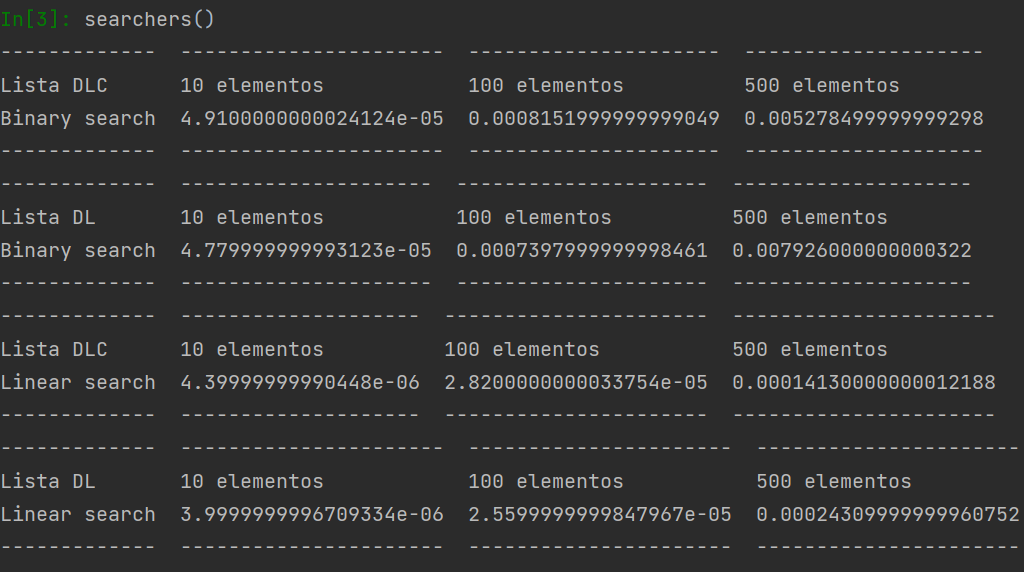

Ao analisarmos a Tabela 1 podemos afirmar que os tempos da lista duplamente ligada circular tendem a ser piores que os da lista duplamente ligada, salvo exceções. 

De seguida, segue-se parte do códido do searchers() que termina na construção do Gráfico 1.

In [ ]:
# listas para guardar os valores para desenhar o gráfico - pesquisa binária duplamente ligada circular
# uso de matplotlib
listaxdlcbinary = []
listaydlcbinary = []
for i in n_elementos:
    listaxdlcbinary.append(i)
    listaydlcbinary.append(lsta.performance_binary_search(i))  # chama o método performance_binary_search(tamanho)
plt.plot(listaxdlcbinary, listaydlcbinary, "-r", label='Binary search DLC')  # legenda e cor linha
plt.legend(loc="upper left")  # localização da legenda

# listas para guardar os valores para desenhar o gráfico - pesquisa binária duplamente ligada
# uso de matplotlib

listaxdlbinary = []
listaydlbinary = []
for i in n_elementos:
    listaxdlbinary.append(i)
    listaydlbinary.append(lst.performance_binary_search(i))  # chama o método performance_binary_search(tamanho)
plt.plot(listaxdlbinary, listaydlbinary, "-b", label='Binary search DL')  # legenda e cor linha
plt.legend(loc="upper left")  # localização da legenda

# listas para guardar os valores para desenhar o gráfico - pesquisa linear duplamente ligada
# uso de matplotlib

listaxdlclinear = []
listaydlclinear = []
for i in n_elementos:
    listaxdlclinear.append(i)
    listaydlclinear.append(lsta.performance_linear_search(i))  # chama o método performance_linear_search(tamanho)
plt.plot(listaxdlclinear, listaydlclinear, "-y", label='Linear search DLC')  # legenda e cor linha
plt.legend(loc="upper left")   # localização da legenda

# listas para guardar os valores para desenhar o gráfico - pesquisa linear duplamente ligada
# uso de matplotlib

listaxdllinear = []
listaydllinear = []
for i in n_elementos:
    listaxdllinear.append(i)
    listaydllinear.append(lst.performance_linear_search(i))  # chama o método performance_linear_search(tamanho)
plt.plot(listaxdllinear, listaydllinear, "-g", label='Linear search DL ')  # legenda e cor linha
plt.legend(loc="upper left")   # localização da legenda

 # instruções do gráfico
plt.xlabel('Nºelementos da lista')  # legenda eixo x
plt.ylabel('Tempo de execução')  # legenda eixo y
plt.title('Searchers da DL e DLC')  # título gráfico
plt.show()  # mostrar gráfico

Um possível resultado do Gráfico 1 é:

#### Gráfico 1

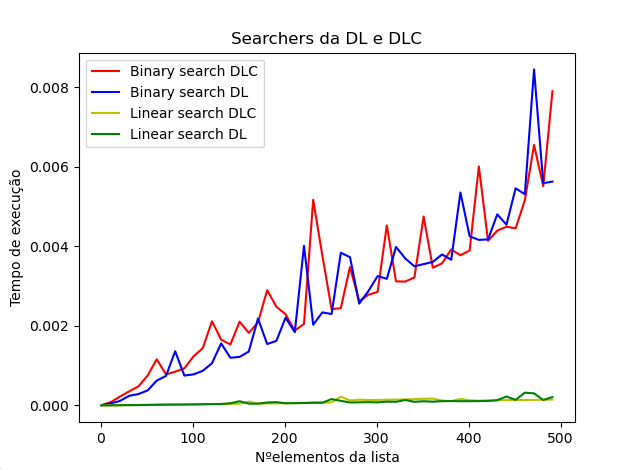

Ao analisarmos o Gráfico 1 podemos concluir, que tal como na tabela 1, o tempo de execução da pesquisa linear e binária da lista duplamente ligada circular tende a ser maior do que o da lista duplamente ligada. Deste modo, a primeira tende a ser menos eficaz comparativamente à última, sendo mais complexa a nível temporal. 

#### Algoritmos de ordenação

##### - Bubble sort

Em teoria, a complexidade temporal do Bubble Sort varia. Se a lista já estiver ordenada - melhor cenário - a complexidade é O(n), se a lista não estiver ordenada - pior cenário - a complexidade é O(n^2), uma vez que vai ter que percorrer a lista n vezes até esta esteja totalmente ordenada.

Em baixo podemos observar o método performance_bubble_sort(tamanho) que conta o tempo que o método ordenar_bubble_sort() demora a ordenar, os elementos por ordem crescente utilizando o Bubble Sort.

Por sua vez, o método bubble_sort() vai criar uma tabela (Tabela 2) e um gráfico (Gráfico 2) para a lista duplamente ligada circular e para a lista duplamente ligada quando o algoritmo de ordenação Bubble Sort é utilizado.

O código para a construção da Tabela 2 é o seguinte:

In [1]:
def performance_bubble_sort(self,tamanho):
    
    random_numbers1 = random.sample(range(10000), tamanho)  # números aleatórios
    random.shuffle(random_numbers1)  # reorganiza a ordem dos elementos
    
    for n in random_numbers1:
        self.ins_end(n)  # chama o método ins_end(item)
    tic = time.perf_counter()  # retorna o valor decimal do tempo do tic
    self.ordenar_('b')  # chama o método ordenar_bubble_sort()
    tac = time.perf_counter()  # retorna o valor decimal do tempo do tac
    self.limpar()  # chama o método limpar()
    return tac - tic

def bubble_sort():
    plt.close()
    lst = ListaDL()
    lsta = ListaDLC()
    n_elementos = list(range(1, 500, 10))
    
    # construção tabela duplamente ligada bubble sort
    # uso de tabulate
    
    table1 = [['Lista DL', '10 elementos', '100 elementos', '500 elementos'],
                ['Bubble sort', lst.performance_bubble_sort(10),
                 lst.performance_bubble_sort(100), lst.performance_bubble_sort(500)]]
    # teste de tempo com 10, 100 e 500 elementos
    # chama o método performance_bubble_sort(tamanho)
    print(tabulate(table1))  # mostrar tabela
    
    # construção tabela duplamente ligada circular bubble sort
    # uso do tabulate
    
    table2 = [['Lista DLC', '10 elementos', '100 elementos', '500 elementos'],
                ['Bubble sort', lsta.performance_bubble_sort(10),
                 lsta.performance_bubble_sort(100), lsta.performance_bubble_sort(500)]]
    # teste de tempo com 10, 100 e 500 elementos
    # chama o método performance_bubble_sort(tamanho)
    print(tabulate(table2))  # mostar tabela

Um possível resultado para a Tabela 2 é:

#### Tabela 2

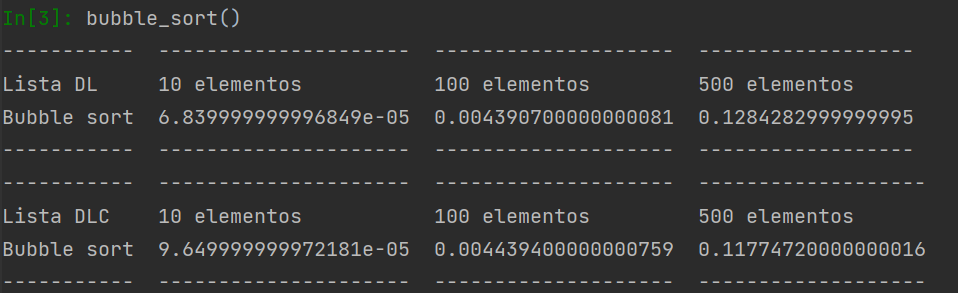

Ao estudarmos a Tabela 2 percebemos que a diferença dos tempos não é muito grande, mas que os da lista duplamente ligada circular costumam ser piores.

O código para a construção do Gráfico 2, que parte do código do bubble_search() é o seguinte:

In [ ]:
    # listas para guardar os valores para desenhar o gráfico (duplamente ligada)
    # uso de matplotlib
    
    listaxdl = []
    listaydl = []
    
    for i in n_elementos:
        listaxdl.append(i)
        listaydl.append(lst.performance_bubble_sort(i))  # chama o método performance_bubble_sort(tamanho)
    plt.plot(listaxdl, listaydl, "-g", label='Lista duplamente ligada')  # legenda e cor da linha
    plt.legend(loc="upper left")  # localização da legenda
    plt.title('Bubble sort')  # título do gráfico
    plt.show()  # mostrar gráfico

    # listas para guardar os valores para desenhar o gráfico (duplamente ligada circular)
    # uso de matplotlib
    
    listaxdlc = []
    listaydlc = []
    
    for i in n_elementos:
        listaxdlc.append(i)
        listaydlc.append(lst.performance_bubble_sort(i))  # chama o método performance_bubble_sort(tamanho)
    plt.plot(listaxdlc, listaydlc, "-b", label='Lista duplamente ligada circular')  # legenda e cor da linha
    plt.legend(loc="upper left")  # localização da legenda
    plt.title('Bubble sort')  # título do gráfico
    plt.xlabel('Nº elementos da lista')  # legenda eixo x
    plt.ylabel('Tempo de execução')  # legenda eixo y
    plt.show()  # mostrar o gráfico

Um possível resultado do gráfico 2 é:

#### Gráfico 2

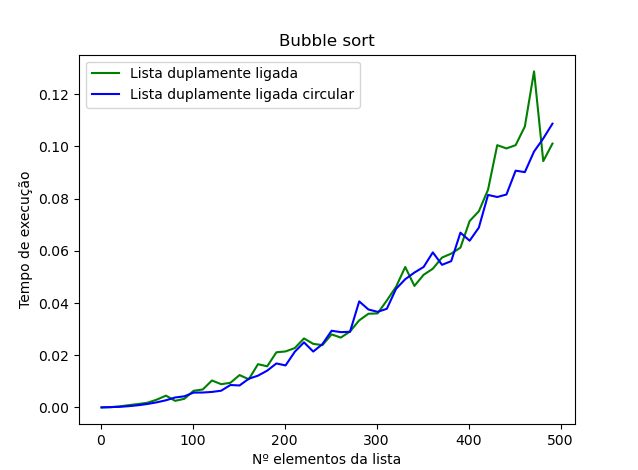

Ao estudarmos o Gráfico 2 podemos afirmar que as variações entre as duas listas não são muito notórias, indo ao encontro dos valores dados pela Tabela 2, sendo que quando o tempo de execução de uma aumenta existe a tendência do mesmo acontecer na outra. Às vezes, principalmente para listas com um número de elementos elevados, ou seja, entre os 400 e 500 a lista duplamente ligada pode demorar consideravelmente mais tempo que a lista duplamente ligada circular.

##### - Merge sort

Em teoria, a complexidade temporal para a Merge Sort é sempre de O(n*log(n)), sendo que n é o número de nós presentes na lista. Esta complexidade prende-se com o facto de o Merge Sort funcionar através da divisão da lista em duas partes aproximadamente iguais, sendo que uma lista com n elementos no máximo pode ser dividida em log n partes e da fundição da lista com n elementos demorar O(n). 

Em baixo podemos observar o método performance_merge_sort(tamanho) que conta o tempo que o método ordenar_merge_sort(aux_pointer_head) demora a ordenar os elementos por ordem crescente recorrendo ao Merge Sort.

Por sua vez, o método merge_sort() vai criar uma tabela (Tabela 3) e um gráfico (Gráfico 3) para a lista duplamente ligada circular e para a lista duplamente ligada quando o algoritmo de ordenação Merge Sort é utilizado.

O código para a construção da Tabela 3 é o seguinte:

In [ ]:
def performance_merge_sort(self, tamanho):
    
    random_numbers1 = random.sample(range(10000), tamanho)  # números aleatórios
    random.shuffle(random_numbers1)  # reorganiza a ordem dos elementos
    
    for n in random_numbers1:
        self.ins_end(n)  # chama o método ins_end(item)
    tic = time.perf_counter()  # retorna o valor decimal do tempo do tic
    self.ordenar_('m')  # chama o método ordenar_merge_sort(aux_pointer_head)
    tac = time.perf_counter()  # retorna o valor decimal do tempo do tac
    self.limpar()  # chama o método limpar()
    return tac - tic

def merge_sort():
    
    plt.close()
    lst = ListaDL()
    lsta = ListaDLC()
    n_elementos = list(range(1, 500, 10))
    
    # tabela com os valores do tempo duplamente ligada
    # uso de tabulate
    
    table1 = [['Lista DL', '10 elementos', '100 elementos', '500 elementos'],
               ['Merge sort', lst.performance_merge_sort(10),
                lst.performance_merge_sort(100), lst.performance_merge_sort(500)]]
    
    # teste de tempo com 10, 100 e 500 elementos
    # chama o método performance_merge_sort(tamanho)
    
    print(tabulate(table1))  # mostrar a tabela
    
    # tabela com os valores do tempo - duplamente ligada circular
    # uso do tabulate
    
    table2 = [['Lista DLC', '10 elementos', '100 elementos', '500 elementos'],
             ['Merge sort', lsta.performance_merge_sort(10),
              lsta.performance_merge_sort(100), lsta.performance_merge_sort(500)]]
    
    # teste de tempo com 10, 100 e 500 elementos
    # chama o método performance_merge_sort(tamanho)
    
    print(tabulate(table2))  # mostrar a tabela

Um possível resultado para a Tabela 3 é:

##### Tabela 3

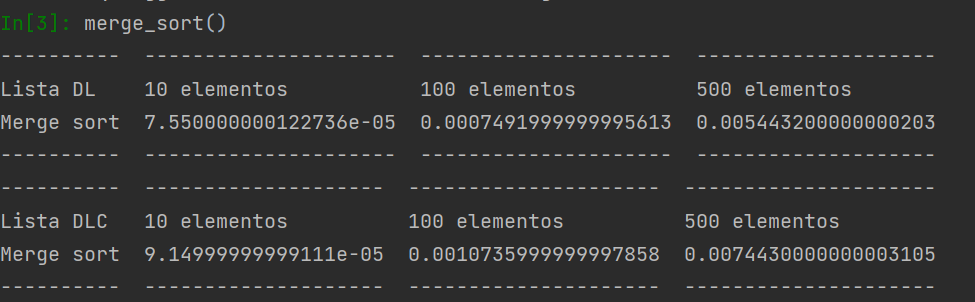

Ao observar a Tabela 3 podemos concluir que a lista duplamente ligada demora menos tempo que a lista duplamente ligada quando se utiliza o algoritmo de ordenação Merge Sort.

O código para a construção do Gráfico 3 é o seguinte:

In [ ]:
# listas para guardar os valores para desenhar o gráfico (duplamente ligada)
# uso de matplotlib

listaxdl = []
listaydl = []

for i in n_elementos:
    listaxdl.append(i)
    listaydl.append(lst.performance_merge_sort(i))  # chama o método performance_merge_sort(tamanho)
plt.plot(listaxdl, listaydl, "-g", label='Lista duplamente ligada')  # legenda e cor da linha
plt.legend(loc="upper left")  # localização da legenda
plt.title('Merge sort')  # título do gráfico
plt.show()  # para mostrar o gráfico

# listas para guardar os valores para desenhar o gráfico (duplamente ligada circular)
# uso do matplotlib

listaxdlc = []
listaydlc = []

for i in n_elementos:
    listaxdlc.append(i)
    listaydlc.append(lst.performance_merge_sort(i))  # chama o método performance_merge_sort(tamanho)
plt.plot(listaxdlc, listaydlc, "-b", label='Lista duplamente ligada circular')  # legenda e cor da linha
plt.legend(loc="upper left")   # localização da legenda
plt.title('Merge sort')  # título do gráfico
plt.xlabel('Nº elementos da lista')  # legenda eixo x
plt.ylabel('Tempo de execução')  # legenda eixo y
plt.show()  # mostrar o gráfico

Um possível resultado do Gráfico 3 é:

#### Gráfico 3

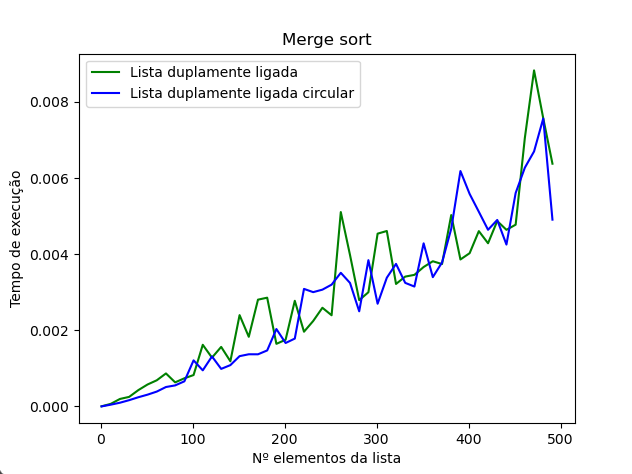

Ao observarmos o Gráfico 3 podemos afirmar que as duas listas tendem a ter comportamentos semelhantes.No entanto, às vezes, a lista duplamente ligada pode demorar consideravelmente mais tempo que a lista duplamente ligada circular, neste gráfico em particular essa diferença é notória principalemente para listas entre os 450 (aproximadamente) e 500 elementos.

Podemos concluir, depois de analisarmos as Tabelas 1 a 3 e os Gráficos 1 a 3 que a lista duplamente ligada circular tende a demorar mais tempo a realizar o que lhe é pedido, pelo que é menos eficiente e mais complexa em termos temporais do que a lista duplamente ligada, o que vai de encontro à especificidade deste tipo de lista.

### - Análise espacial assintótica

##### Pesquisa Binária

A complexidade espacial da pesquisa binária é O(1), porque temos um método iterativo e não é preciso nenhum espaço de memória adicional para percorrer a lista e fazer a pesquisa. Apenas precisamos de duas variáveis para localizar os elementos que faltam ser analisados.

#### Pesquisa Linear

A complexidade espacial da pesquisa linear é O(1), pois a comparação entre o item e o valor do nó é feita sequencialmente, pelo que temos que percorrer a lista elemento a elemento, comparando o valor deste com o valor do item desejado.

Ao não ser preciso espaço extra na memória, exceto para o iterador que percorre a lista toda, é sempre preciso o mesmo espaço extra para a pesquisa linear, independentemente do tamanho da lista. Deste modo, vamos sempre precisar do mesmo espaço de memória.

Este recebe uma lista de tamanho n e tem as seguintes variáveis auxiliares: position, self.__head e pointer - na lista duplamente ligada circular - e as seguintes variáveis auxiliares i, found e pointer, na lista duplamente ligada.

#### Algoritmos de ordenação

A complexidade espacial para a Bubble Sort é O(1), porque  para além da lista com n elementos este algoritmo de ordenação apenas requer uma quantidade constante de espaço extra. Temos as seguintes variáveis auxiliares: self.__head, swap, last_pointer e aux_pointer. 

Como o algoritmo é igual nas duas listas este tem a mesma complexidade espacial nos tipos de listas.

Quanto à complexidade espacial do Merge Sort é O(n) porque dividimos e guardamos o total de espaço consumido para fazer a lista e para fundir as partes até que se forme uma lista ordenada do mesmo tamanho que a original. É importante realçar que a lista tem n elementos.

Análise das variáveis auxiliares dos métodos auxiliares e do método principal do Merge Sort na lista duplamente ligada circular, 
- O split_head(head) tem as seguintes variáveis auxiliares s, f e pointer -> 3. 
- O merge(a, b) não tem variáveis auxiliares -> 0.
- O ordenar_merge_sort(head) tem como variáveis auxiliares s e head -> 2

Análise das variáveis auxiliares dos métodos auxiliares e do método principal do Merge Sort na lista duplamente ligada:
- O get_middle(head) tem as seguintes variáveis auxiliares slow_pointer e fast_pointer -> 3. 
- O sorted_merge(left, right) não tem variáveis auxiliares -> 0.
- O ordenar_merge_sort(aux_pointer_head)) tem como variáveis auxiliares middle, middle_next, left_list, right_list, sorted_list, walker e prev -> 7

Podemos concluir, que de forma geral, a complexidade espacial da pesquisa linear, da pesquisa binária, do Bubble Sort e do Merge Sort não variam com o tipo de lista duplamente ligada ou duplamente ligada circular.

--------------------------------------------------------------------------------------------------------------------------

### Responsabilidades de cada membro do grupo: 

No inicio do nosso trabalho de grupo dividimos as tarefas entre nós, sendo que a fase 1 estava encarregue ao João, a fase 1.1 à Umeima, a fase 2 à Eliane e o relatório à Maria João. No entanto no decorrer do trabalho, fomo-nos entreajudando a fim de conseguirmos completar as tarefas propostas. 

##### -- Nota em particular --

As tabelas e os gráficos foram realizados no ASUS ZenBook 14, Core i5, 8th gen